## Nairobi Data Analysis

In [1]:
# importing the needed libraries
# type: ignore
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Loading Nairobi Data

In [2]:
# read the nairobi Kenya csv file
nairobi = pd.read_csv('Kenya(Nairobi).csv')
nairobi

,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,2156118,Nairobi,pm25,6.4,µg/m³,2024-01-28T16:00:00+00:00,2024-01-28T19:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
1,2156118,Nairobi,pm25,9.1,µg/m³,2024-01-28T17:00:00+00:00,2024-01-28T20:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
2,2156118,Nairobi,pm25,8.8,µg/m³,2024-01-28T18:00:00+00:00,2024-01-28T21:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
3,2156118,Nairobi,pm25,9.3,µg/m³,2024-01-28T19:00:00+00:00,2024-01-28T22:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
4,2156118,Nairobi,pm25,11.0,µg/m³,2024-01-28T20:00:00+00:00,2024-01-28T23:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,2156118,Nairobi,pm25,14.0,µg/m³,2024-06-30T20:00:00+00:00,2024-06-30T23:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
3356,2156118,Nairobi,pm25,17.0,µg/m³,2024-06-30T21:00:00+00:00,2024-07-01T00:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
3357,2156118,Nairobi,pm25,10.0,µg/m³,2024-06-30T22:00:00+00:00,2024-07-01T01:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
3358,2156118,Nairobi,pm25,7.4,µg/m³,2024-06-30T23:00:00+00:00,2024-07-01T02:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity


##  Describing the data

In [3]:
# showing the shape of the dataset
print(f'The Tuen Mun dataset is made up of{nairobi.shape}')

# showing the information about the dataset.
nairobi.head()

The Tuen Mun dataset is made up of(3360, 15)


,location_id,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone,latitude,longitude,country_iso,isMobile,isMonitor,owner_name,provider
0,2156118,Nairobi,pm25,6.4,µg/m³,2024-01-28T16:00:00+00:00,2024-01-28T19:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
1,2156118,Nairobi,pm25,9.1,µg/m³,2024-01-28T17:00:00+00:00,2024-01-28T20:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
2,2156118,Nairobi,pm25,8.8,µg/m³,2024-01-28T18:00:00+00:00,2024-01-28T21:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
3,2156118,Nairobi,pm25,9.3,µg/m³,2024-01-28T19:00:00+00:00,2024-01-28T22:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity
4,2156118,Nairobi,pm25,11.0,µg/m³,2024-01-28T20:00:00+00:00,2024-01-28T23:00:00+03:00,Africa/Nairobi,-1.33159,36.91271,NaN,NaN,NaN,Clarity,Clarity


## Data cleaning and wrangling

This process will involve the following steps:
* Dropping unneccesary columns.
* Handling missing values.
* Removing duplicates.
* Concerting datetimeLocal and datetimeUtc to a pandas datetime
* Setting datetimeLocal and datetimeUtc as index
* Creating a pivot table for the with the pollutants as the column and the datetimeUtc as index

In [4]:
# dropping unnecessary columns
"""
This function removes all the unnecessary columns
"""
def clean_data(nairobi):
    # Drop column: 'latitude'
    nairobi = nairobi.drop(columns=['latitude'])
    nairobi = nairobi.drop(columns=['longitude'])
    nairobi = nairobi.drop(columns=['country_iso'])
    nairobi = nairobi.drop(columns=['isMobile'])
    nairobi = nairobi.drop(columns=['isMonitor'])
    nairobi = nairobi.drop(columns=['owner_name'])
    nairobi = nairobi.drop(columns=['provider'])
    nairobi = nairobi.drop(columns=['location_id'])
    return nairobi

# checking for duplicate values
dup = nairobi.duplicated().sum()
print('The number of duplicates values is: ', dup)

# invoving the function
nairobi_clean = clean_data(nairobi.copy())

# checking for missing values
missing = nairobi_clean.isnull().sum()
print(f'The number of missing values are: {missing}')

# checking for duplicate values.
duplicate = nairobi_clean.duplicated().sum()
print(f'The number of duplicate values are: {duplicate}')

# converting datetimeLocal and datetimeUtc to pandas datetime
nairobi_clean['datetimeUtc'] = pd.to_datetime(nairobi_clean['datetimeUtc'], utc=True)
nairobi_clean['datetimeLocal'] = pd.to_datetime(nairobi_clean['datetimeLocal'])

# setting both datetimeLocal and Utc as index
nairobi_clean.set_index(nairobi_clean['datetimeUtc'])
nairobi_clean.set_index(nairobi_clean['datetimeLocal'])

# displaying the first 10 observations
nairobi_clean.head(10)

The number of duplicates values is:  0
The number of missing values are: location_name    0
parameter        0
value            0
unit             0
datetimeUtc      0
datetimeLocal    0
timezone         0
dtype: int64
The number of duplicate values are: 0


,location_name,parameter,value,unit,datetimeUtc,datetimeLocal,timezone
0,Nairobi,pm25,6.4,µg/m³,2024-01-28 16:00:00+00:00,2024-01-28 19:00:00+03:00,Africa/Nairobi
1,Nairobi,pm25,9.1,µg/m³,2024-01-28 17:00:00+00:00,2024-01-28 20:00:00+03:00,Africa/Nairobi
2,Nairobi,pm25,8.8,µg/m³,2024-01-28 18:00:00+00:00,2024-01-28 21:00:00+03:00,Africa/Nairobi
3,Nairobi,pm25,9.3,µg/m³,2024-01-28 19:00:00+00:00,2024-01-28 22:00:00+03:00,Africa/Nairobi
4,Nairobi,pm25,11.0,µg/m³,2024-01-28 20:00:00+00:00,2024-01-28 23:00:00+03:00,Africa/Nairobi
5,Nairobi,pm25,11.0,µg/m³,2024-02-04 08:00:00+00:00,2024-02-04 11:00:00+03:00,Africa/Nairobi
6,Nairobi,pm25,9.4,µg/m³,2024-02-04 09:00:00+00:00,2024-02-04 12:00:00+03:00,Africa/Nairobi
7,Nairobi,pm25,8.5,µg/m³,2024-02-04 10:00:00+00:00,2024-02-04 13:00:00+03:00,Africa/Nairobi
8,Nairobi,pm25,6.1,µg/m³,2024-02-04 11:00:00+00:00,2024-02-04 14:00:00+03:00,Africa/Nairobi
9,Nairobi,pm25,5.6,µg/m³,2024-02-04 12:00:00+00:00,2024-02-04 15:00:00+03:00,Africa/Nairobi


In [5]:
# Creating a pivot table for the pollutants
# creating a pivot table
nairobi_pivot = nairobi_clean.pivot_table(
    values='value',
    index=['datetimeLocal', 'datetimeUtc'],
    columns='parameter'
)
# resetting the index for readability
nairobi_pivot.reset_index(inplace=True)

# filling the missing value with 0
nairobi_pivot = nairobi_pivot.fillna(0)

# displaying the first 10 obs.
nairobi_pivot.head(10)

parameter,datetimeLocal,datetimeUtc,pm25
0,2024-01-28 19:00:00+03:00,2024-01-28 16:00:00+00:00,6.4
1,2024-01-28 20:00:00+03:00,2024-01-28 17:00:00+00:00,9.1
2,2024-01-28 21:00:00+03:00,2024-01-28 18:00:00+00:00,8.8
3,2024-01-28 22:00:00+03:00,2024-01-28 19:00:00+00:00,9.3
4,2024-01-28 23:00:00+03:00,2024-01-28 20:00:00+00:00,11.0
5,2024-02-04 11:00:00+03:00,2024-02-04 08:00:00+00:00,11.0
6,2024-02-04 12:00:00+03:00,2024-02-04 09:00:00+00:00,9.4
7,2024-02-04 13:00:00+03:00,2024-02-04 10:00:00+00:00,8.5
8,2024-02-04 14:00:00+03:00,2024-02-04 11:00:00+00:00,6.1
9,2024-02-04 15:00:00+03:00,2024-02-04 12:00:00+00:00,5.6


## Descriptive Statistics
* This will be focusing on the basic descriptive statistics for the pollutant, including mean, mode, max, and minimum values.

In [6]:
# describing the nairobi_pivot
desc = [nairobi_pivot['pm25'].describe()]
desc = pd.DataFrame(desc)
print("The descriptive statistics for the pollutants is:", '\n', desc)

The descriptive statistics for the pollutants is: 
        count       mean        std  min  25%   50%   75%    max
pm25  3360.0  50.866548  66.971691  0.0  7.6  12.0  85.0  210.0


## Calculating the Air Quality Index
Since the Nairobi dataset only has one pollutant, pm25, we will calculate the AQI for pm25 and the total AQI.
* ` It is expected that the pm25_AQI to be the same as the mx AQI`

In [7]:
# create a breakpoint dictionary
breakpoints = {
    'pm25': [(0.0, 12.0, 0, 50), (12.1, 35.4, 51, 100), (35.5, 55.4, 101, 150), (55.5, 150.4, 151, 200), (150.5, 250.4, 201, 300)], 
}
# declare a function calculate_aqi
def calculate_aqi(concentration, breakpoints):
    for bp in breakpoints:
        if bp[0] <= concentration <= bp[1]:
            return (bp[3] - bp[2]) / (bp[1] - bp[0]) * (concentration - bp[0]) + bp[2]
    return None
# Sample DataFrame with pollutant concentrations
data = {
    'datetimeUtc': pd.date_range(start='2024-01-01', periods=4369, freq='h'),
    'pm25': np.random.uniform(0, 250, 4369),
}
nairobi_aqi = pd.DataFrame(data)

# Calculate AQI for pm25
nairobi_aqi['AQI_pm25'] = nairobi_aqi['pm25'].apply(lambda x: calculate_aqi(x, breakpoints['pm25']))

# Calculate overall AQI as the maximum of individual AQIs
nairobi_aqi['AQI'] = nairobi_aqi[['AQI_pm25']].max(axis=1)

# setting datetimeutc as index
nairobi_aqi.set_index('datetimeUtc', inplace=True)

# Calculate overall AQI as the maximum of individual AQIs
nairobi_aqi.head()


,pm25,AQI_pm25,AQI
datetimeUtc,,,
2024-01-01 00:00:00,26.949909,82.229423,82.229423
2024-01-01 01:00:00,114.088207,181.251024,181.251024
2024-01-01 02:00:00,150.526389,201.026152,201.026152
2024-01-01 03:00:00,143.275872,196.321578,196.321578
2024-01-01 04:00:00,66.935250,156.904397,156.904397


## Exploratory analysis
* In this section, we will visualize the trends of pm25 pollutant in Nairobi. This will be done hourly, then resampled to daily, then monthly.

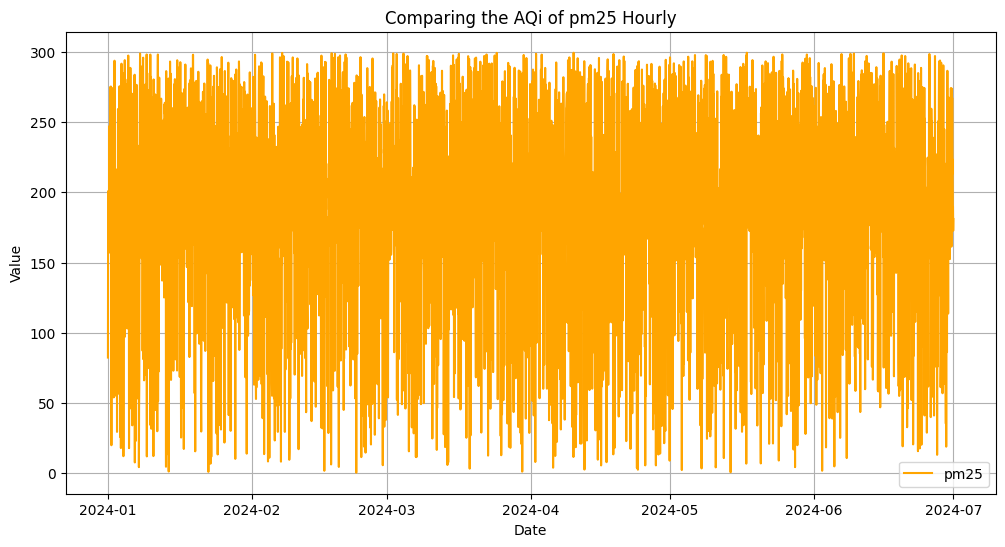

In [8]:
# comparing the level of each pollutant
# setting the figure size
# type: ignore
plt.figure(figsize=(12,6))
sns.lineplot(data = nairobi_aqi, x='datetimeUtc', y='AQI_pm25', label='pm25', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing the AQi of pm25 Hourly')
plt.legend()
plt.grid(True)
plt.show()

## Resampling the data
To get a clearer view of the trends

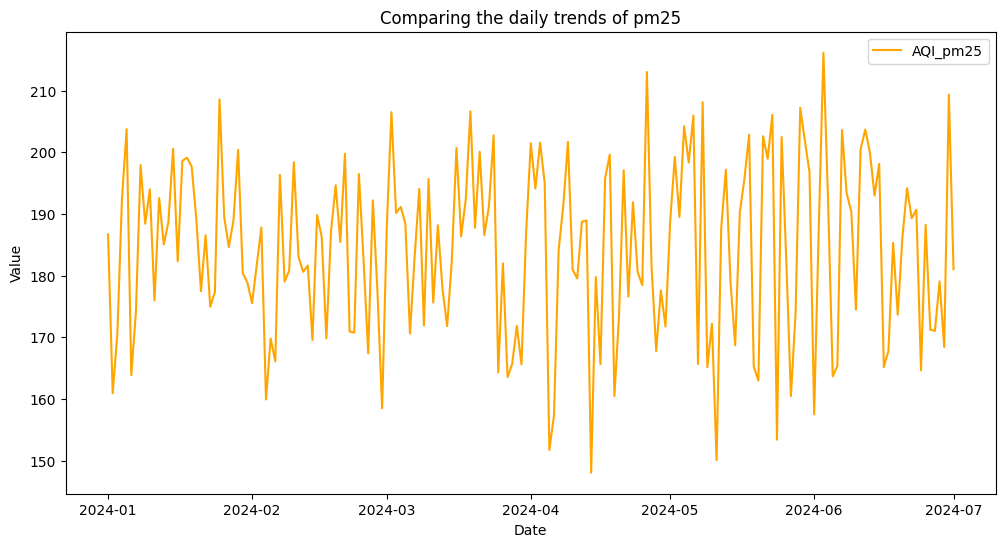

In [9]:
# Resampling the data to daily basis for a clearer view
# type: ignore
nairobi_aqi_resampled_daily = nairobi_aqi.resample('D').mean()

# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = nairobi_aqi_resampled_daily, x='datetimeUtc', y='AQI_pm25', label='AQI_pm25', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing the daily trends of pm25')
plt.legend()
plt.show()

## Comparing the level of PM25 resampled monthly.

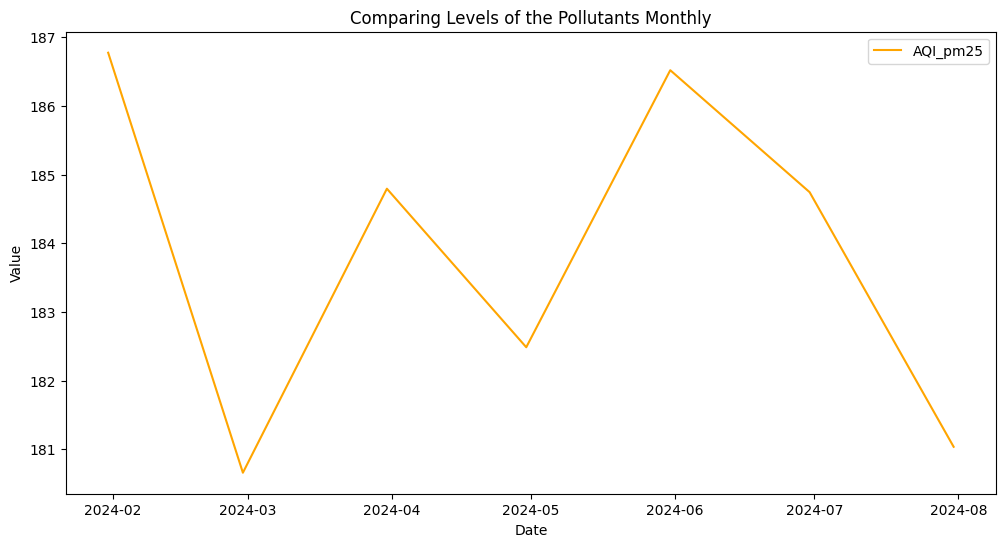

,pm25,AQI_pm25,AQI
datetimeUtc,,,
2024-01-31,127.142210,186.776169,186.776169
2024-02-29,120.344149,180.656356,180.656356
2024-03-31,124.705039,184.794816,184.794816
2024-04-30,123.938525,182.484727,182.484727
2024-05-31,127.481332,186.521331,186.521331
2024-06-30,123.754050,184.744151,184.744151
2024-07-31,113.668359,181.034242,181.034242


In [10]:
# resampling it to a monthly basis
# type: ignore
nairobi_aqi_resampled_monthly = nairobi_aqi.resample('ME').mean()

# setting the figure size
plt.figure(figsize=(12,6))
sns.lineplot(data = nairobi_aqi_resampled_monthly, x='datetimeUtc', y='AQI_pm25', label='AQI_pm25', color='orange')

# adding labels and title
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparing Levels of the Pollutants Monthly')
plt.legend()
plt.show()
nairobi_aqi_resampled_monthly

## Comparing which month had the highest level of pm25

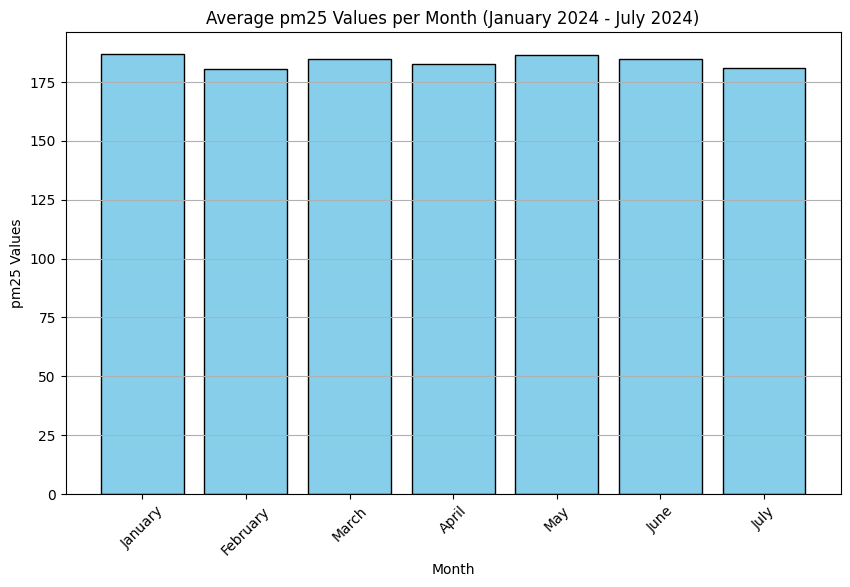

In [11]:
# Data
dates = ["2024-01-31", "2024-02-29", "2024-03-31", "2024-04-30", "2024-05-31", "2024-06-30", "2024-07-31"]
pm25_values = nairobi_aqi_resampled_monthly['AQI_pm25']

# Convert dates to month names
months = pd.to_datetime(dates).strftime('%B')

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(months, pm25_values, color='skyblue', edgecolor='black')
plt.title('Average pm25 Values per Month (January 2024 - July 2024)')
plt.xlabel('Month')
plt.ylabel('pm25 Values')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.show()


* In the month of July, the AQI of pm25 was particularly higher in the month of July compared to the other months.
* Tha AQI varied from the month of January to June from the range of 180 to 186

## Detecting Seasonality using Additive Decomposition.
In this example, we will use the `additive_decomposition` function from the `statsmodels
The Additive decomposition separates the time series into trend, seasonal, and residual components assuming that the time series is equal to trend + seasonality + noise

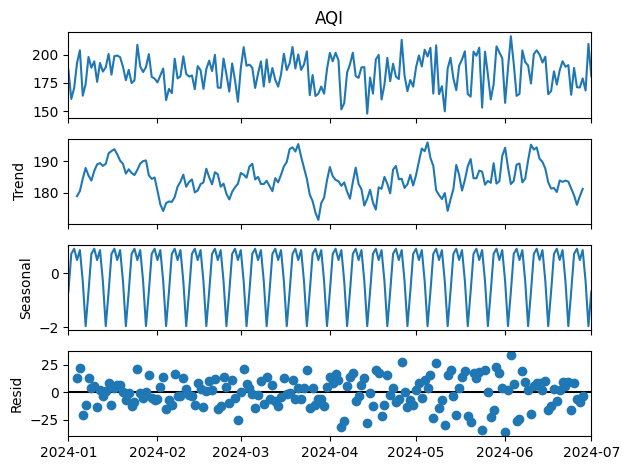

In [12]:
# checking for seasonality
result = seasonal_decompose(nairobi_aqi_resampled_daily['AQI'], model='additive')
result.plot()
plt.show()

The image you provided shows a time series decomposition of Air Quality Index (AQI) data from January 2024 to July 2024. Let's break down each component:

### 1. AQI (Top Plot)
- **Description**: This plot shows the actual AQI values over time.
- **Observation**: The AQI values fluctuate between approximately 50 and slightly above 200, indicating varying air quality levels over the period.

### 2. Trend (Second Plot)
- **Description**: This plot represents the long-term trend in the AQI data, excluding seasonal variations and random noise.
- **Observation**: There is a general upward trend, suggesting that the AQI values are increasing over time, which could indicate worsening air quality.

### 3. Seasonal (Third Plot)
- **Description**: This plot shows the repeating short-term cycles in the AQI data.
- **Observation**: The plot displays consistent oscillations, indicating regular seasonal effects on AQI. This could be due to factors like weather changes or periodic pollution sources.

### 4. Resid (Bottom Plot)
- **Description**: This scatter plot represents the residuals, which are the irregularities or randomness in the data after removing the trend and seasonal components.
- **Observation**: The points are scattered around zero without any clear pattern, indicating that the remaining variations are random and not explained by trend or seasonality.

### Interpretation:
- **Overall Trend**: The increasing trend in AQI suggests a potential long-term deterioration in air quality.
- **Seasonal Patterns**: Regular oscillations in the seasonal component indicate predictable changes in AQI due to seasonal factors.
- **Random Variations**: The residuals show that there are random fluctuations in AQI that are not explained by the trend or seasonal components.